In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv(filepath_or_buffer="Electronic_sales_Sep2023-Sep2024.csv", sep=",")
df.head(5)

,Customer ID,Age,Gender,Loyalty Member,Product Type,SKU,Rating,Order Status,Payment Method,Total Price,Unit Price,Quantity,Purchase Date,Shipping Type,Add-ons Purchased,Add-on Total
0,1000,53,Male,No,Smartphone,SKU1004,2,Cancelled,Credit Card,5538.33,791.19,7,2024-03-20,Standard,"Accessory,Accessory,Accessory",40.21
1,1000,53,Male,No,Tablet,SKU1002,3,Completed,Paypal,741.09,247.03,3,2024-04-20,Overnight,Impulse Item,26.09
2,1002,41,Male,No,Laptop,SKU1005,3,Completed,Credit Card,1855.84,463.96,4,2023-10-17,Express,NaN,0.00
3,1002,41,Male,Yes,Smartphone,SKU1004,2,Completed,Cash,3164.76,791.19,4,2024-08-09,Overnight,"Impulse Item,Impulse Item",60.16
4,1003,75,Male,Yes,Smartphone,SKU1001,5,Completed,Cash,41.50,20.75,2,2024-05-21,Express,Accessory,35.56


### Preferred payment method

In [3]:
preferred_payment = (
    df.groupby('Customer ID')['Payment Method']
    .agg(lambda x: x.mode()[0])
    .reset_index(name='Preferred_Payment_Method')
)

In [4]:
preferred_payment

,Customer ID,Preferred_Payment_Method
0,1000,Credit Card
1,1002,Cash
2,1003,Cash
3,1004,Credit Card
4,1005,Debit Card
...,...,...
12131,19994,Bank Transfer
12132,19995,Credit Card
12133,19996,Bank Transfer
12134,19997,Bank Transfer


### Total (Only completed status)

In [5]:
total_spent = (
    df[df['Order Status'] == 'Completed']
    .groupby('Customer ID')['Total Price']
    .sum()
    .reset_index(name='Total Spent')
)
total_spent

,Customer ID,Total Spent
0,1000,741.09
1,1002,5020.60
2,1003,41.50
3,1004,83.00
4,1005,11779.11
...,...,...
9461,19990,9117.44
9462,19991,12368.06
9463,19995,5394.56
9464,19996,12063.02


### Additional costs

In [6]:
add_costs = (
    df[df['Order Status'] == 'Completed']
    .groupby('Customer ID')['Add-on Total']
    .sum()
    .reset_index(name='Add-ons Spent')
)
add_costs

,Customer ID,Add-ons Spent
0,1000,26.09
1,1002,60.16
2,1003,35.56
3,1004,65.78
4,1005,75.33
...,...,...
9461,19990,113.56
9462,19991,0.00
9463,19995,0.00
9464,19996,198.98


## Final

In [7]:
customer_summary = (
    preferred_payment
    .merge(total_spent, on='Customer ID', how='left')
    .merge(add_costs, on='Customer ID', how='left')
)

customer_summary.fillna(0, inplace=True)
customer_summary.head(10)


,Customer ID,Preferred_Payment_Method,Total Spent,Add-ons Spent
0,1000,Credit Card,741.09,26.09
1,1002,Cash,5020.60,60.16
2,1003,Cash,41.50,35.56
3,1004,Credit Card,83.00,65.78
4,1005,Debit Card,11779.11,75.33
5,1006,Cash,6645.94,90.38
6,1007,Credit Card,0.00,0.00
7,1008,Cash,3379.32,65.85
8,1011,Credit Card,7911.90,70.17
9,1013,Paypal,0.00,0.00


### Income
##### Delivery

In [8]:
df['Purchase Date'] = pd.to_datetime(df['Purchase Date'])
df['Month'] = df['Purchase Date'].dt.to_period('M')
df['Quarter'] = df['Purchase Date'].dt.to_period('Q')

completed = df[df['Order Status'] == 'Completed']
completed.head()

,Customer ID,Age,Gender,Loyalty Member,Product Type,SKU,Rating,Order Status,Payment Method,Total Price,Unit Price,Quantity,Purchase Date,Shipping Type,Add-ons Purchased,Add-on Total,Month,Quarter
1,1000,53,Male,No,Tablet,SKU1002,3,Completed,Paypal,741.09,247.03,3,2024-04-20,Overnight,Impulse Item,26.09,2024-04,2024Q2
2,1002,41,Male,No,Laptop,SKU1005,3,Completed,Credit Card,1855.84,463.96,4,2023-10-17,Express,NaN,0.00,2023-10,2023Q4
3,1002,41,Male,Yes,Smartphone,SKU1004,2,Completed,Cash,3164.76,791.19,4,2024-08-09,Overnight,"Impulse Item,Impulse Item",60.16,2024-08,2024Q3
4,1003,75,Male,Yes,Smartphone,SKU1001,5,Completed,Cash,41.50,20.75,2,2024-05-21,Express,Accessory,35.56,2024-05,2024Q2
5,1004,41,Female,No,Smartphone,SKU1001,5,Completed,Credit Card,83.00,20.75,4,2024-05-26,Standard,"Impulse Item,Accessory",65.78,2024-05,2024Q2


In [9]:
income_delivery = (
    completed.groupby('Shipping Type')['Total Price']
    .sum()
    .reset_index()
)
income_delivery

,Shipping Type,Total Price
0,Expedited,8430385.58
1,Express,5632093.35
2,Overnight,5887722.52
3,Same Day,8292376.50
4,Standard,14387037.62


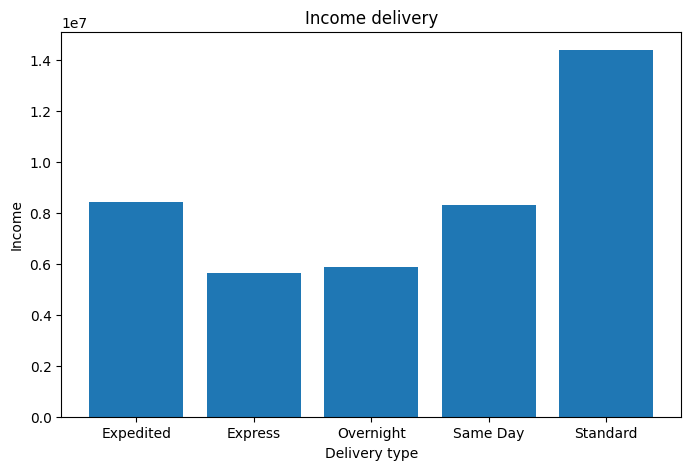

In [10]:
plt.figure(figsize=(8,5))
plt.bar(income_delivery['Shipping Type'], income_delivery['Total Price'])
plt.title('Income delivery')
plt.xlabel('Delivery type')
plt.ylabel('Income')
plt.show()

#### Product type

In [11]:
income_by_product = (
    completed.groupby('Product Type')['Total Price']
    .sum()
    .reset_index()
)
income_by_product

,Product Type,Total Price
0,Headphones,2734651.00
1,Laptop,8365905.25
2,Smartphone,14407835.84
3,Smartwatch,9398591.23
4,Tablet,7722632.25


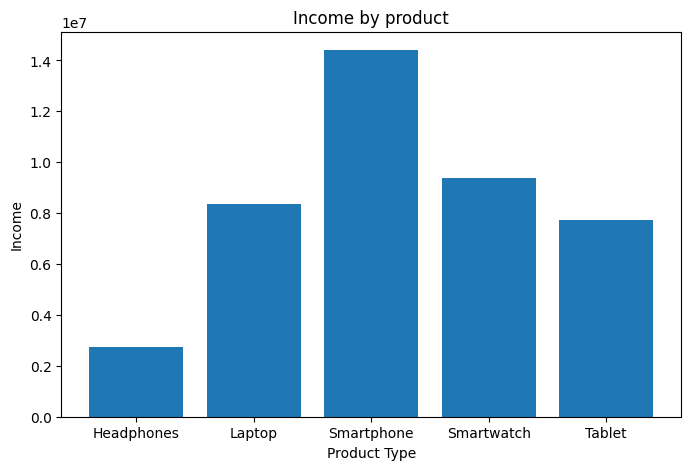

In [12]:
plt.figure(figsize=(8,5))
plt.bar(income_by_product['Product Type'], income_by_product['Total Price'])
plt.title('Income by product')
plt.xlabel('Product Type')
plt.ylabel('Income')
plt.show()

#### Per month

In [13]:
addons_by_month = (
    completed.groupby('Month')['Add-on Total']
    .sum()
    .reset_index()
)
addons_by_month

,Month,Add-on Total
0,2023-09,5337.61
1,2023-10,26153.21
2,2023-11,24453.33
3,2023-12,22750.23
4,2024-01,93254.95
5,2024-02,80253.72
6,2024-03,84713.93
7,2024-04,82294.06
8,2024-05,89374.18
9,2024-06,84648.60


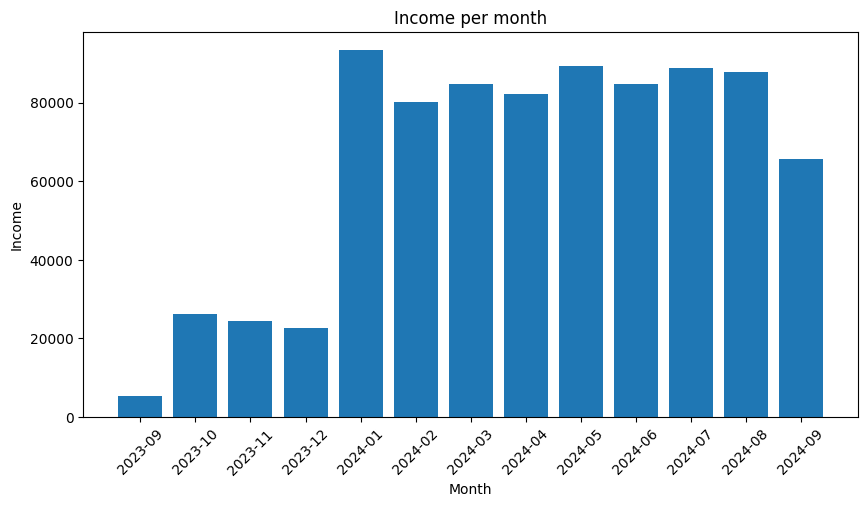

In [14]:
plt.figure(figsize=(10,5))
plt.bar(addons_by_month['Month'].astype(str), addons_by_month['Add-on Total'])
plt.title('Income per month')
plt.xlabel('Month')
plt.ylabel('Income')
plt.xticks(rotation=45)
plt.show()


#### Per quarter

In [15]:
addons_by_quarter = (
    completed.groupby('Quarter')['Add-on Total']
    .sum()
    .reset_index()
)
addons_by_quarter

,Quarter,Add-on Total
0,2023Q3,5337.61
1,2023Q4,73356.77
2,2024Q1,258222.60
3,2024Q2,256316.84
4,2024Q3,242361.42


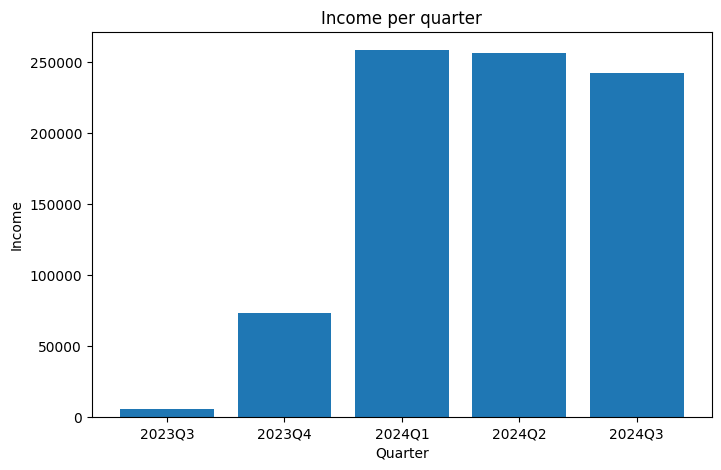

In [16]:
plt.figure(figsize=(8,5))
plt.bar(addons_by_quarter['Quarter'].astype(str), addons_by_quarter['Add-on Total'])
plt.title('Income per quarter')
plt.xlabel('Quarter')
plt.ylabel('Income')
plt.show()